In [1]:
import numpy as np
from numpy import exp as e
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from astropy import constants as const
from astropy import units as u
from astropy.cosmology import Planck15 as cosmo
from sympy import * 
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from scipy.optimize import fsolve as fsolve
from scipy import integrate

In [2]:
# vec = [x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vz3]
G = 1 
ϵ = 1
def df_3body(vec,t,M1,M2, M3):
    r1=vec[0:3]
    r2=vec[6:9]
    r3=vec[12:15]
    x = np.array([r1[0], r2[0], r3[0]])
    y = np.array([r1[1], r2[1], r3[1]])
    z = np.array([r1[2], r2[2], r3[2]])
    Dx = np.subtract.outer(x,x)
    Dy = np.subtract.outer(y,y)
    Dz = np.subtract.outer(z,z)
    M = np.array([M1, M2, M3])
    
    #acc = dv/dt    
    bracketx = Dx/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accex = -np.dot(M, bracketx)
    
    brackety = Dy/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accey = -np.dot(M, brackety)
    
    bracketz = Dz/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accez = -np.dot(M, bracketz)    
    
    dvec=np.zeros(len(vec))
    dvec[0] =vec[3]
    dvec[1] =vec[4]
    dvec[2] =vec[5]
    dvec[3] =accex[0]
    dvec[4] =accey[0]
    dvec[5] =accez[0]

    dvec[6] =vec[6]
    dvec[7] =vec[7]
    dvec[8] =vec[8]
    dvec[9] =accex[1]
    dvec[10] =accey[1]
    dvec[11] =accez[1]

    dvec[12] =vec[9]
    dvec[13] =vec[10]
    dvec[14] =vec[11]
    dvec[15] =accex[2]
    dvec[16] =accey[2]
    dvec[17] =accez[2]
    
    return dvec

In [3]:
body1 = np.array([1,1,1,1,1,1])
body2 = np.array([1,1,1,1,1,1])
body3 = np.array([1,1,1,1,1,1])
M1 = 1
M2 = 2*M1
M3=3*M1
v0=np.array([body1, body2, body3]).flatten()
tarr=np.linspace(0.0, 1, 400)
result=integrate.odeint(df_3body,v0,tarr,args=(M1,M2,M3))
x1=result[0:,0]
y1=result[0:,1]
z1=result[0:,2]
vx1=result[0:,3]
vy1=result[0:,4]
vz1=result[0:,5]

x2=result[0:,6]
y2=result[0:,7]
z2=result[0:,8]
vx2=result[0:,9]
vy2=result[0:,10]
vz2=result[0:,11]

x3=result[0:,12]
y3=result[0:,13]
z3=result[0:,14]
vx3=result[0:,15]
vy3=result[0:,16]
vz3=result[0:,17]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


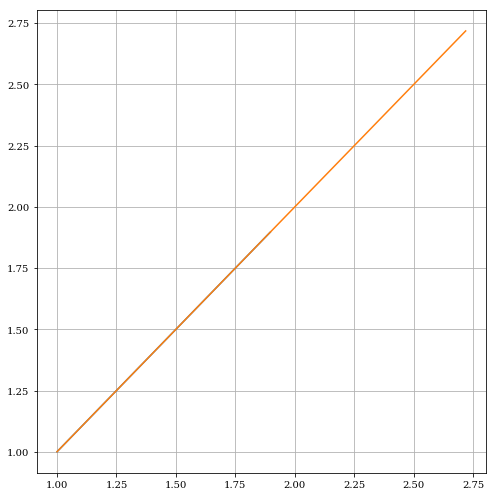

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
#ax.set_ylabel()
#ax.set_xlabel()
#ax.set_title()
ax.plot(x1,y1)
ax.plot(x2,y2)
#plt.legend()
plt.grid()
plt.show()